In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd

### Exercise 3

In [2]:
def black_scholes(S, K, T, r, sigma, q=0, type='call', T_theta_type='calendar'):

    K = np.array(K)
    S = np.repeat(S, len(K))
    T = np.repeat(T, len(K))

    d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if type == 'call':
        price = S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
        delta = np.exp(-q * T) * norm.cdf(d1)
        theta = (-(S * sigma * np.exp(-q * T) * norm.pdf(d1)) / (2 * np.sqrt(T))
                 - r * K * np.exp(-r * T) * norm.cdf(d2)
                 + q * S * np.exp(-q * T) * norm.cdf(d1))
    elif type == 'put':
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
        delta = np.exp(-q * T) * (norm.cdf(d1)-1)
        theta = (-(S * sigma * np.exp(-q * T) * norm.pdf(d1)) / (2 * np.sqrt(T))
                 + r * K * np.exp(-r * T) * norm.cdf(-d2)
                 - q * S * np.exp(-q * T) * norm.cdf(-d1))

    gamma = (np.exp(-q * T) * norm.pdf(d1)) / (S * sigma * np.sqrt(T))
    vega = S * np.exp(-q * T) * norm.pdf(d1) * np.sqrt(T)

    if T_theta_type == 'calendar':
      theta = theta / 365
    elif T_theta_type == 'trading':
      theta = theta / 252
    elif T_theta_type == 'year':
      theta = theta

    return price, delta, gamma, theta, vega

In [3]:
S = 100
K = [90, 95, 100, 105, 110]
T = 0.5
r = 0.05
sigma = 0.1
q = 0.005

res = black_scholes(S, K, T, r, sigma, q, 'call', 'calendar')
res

(array([12.06489495,  7.6165543 ,  4.03128023,  1.71688055,  0.57552978]),
 array([0.96496211, 0.85754846, 0.63656978, 0.36734862, 0.15963006]),
 array([0.01028739, 0.03144496, 0.05286837, 0.05318136, 0.03432772]),
 array([-0.0116533 , -0.01383668, -0.01453813, -0.01157888, -0.00659163]),
 array([ 5.14369482, 15.72247765, 26.4341851 , 26.59068247, 17.16385852]))

In [4]:
K = [100]
T_val = [1/365, 1/12, 1/4, 1/2, 1, 3]
sigma_val = np.linspace(0.1, 0.4, 10)
spot_val = np.linspace(1, 200, 200)

delta_res_T = np.zeros(shape=(len(T_val), len(spot_val)))
delta_res_sig = np.zeros(shape=(len(sigma_val), len(spot_val)))
gamma_res_T = np.zeros(shape=(len(T_val), len(spot_val)))
gamma_res_sig = np.zeros(shape=(len(sigma_val), len(spot_val)))

for i in range(len(T_val)):
  for j in range(len(spot_val)):
    res = black_scholes(spot_val[j], K, T_val[i], r, sigma, q, 'call', 'calendar')
    delta_res_T[i][j] = res[1]

for i in range(len(sigma_val)):
  for j in range(len(spot_val)):
    res = black_scholes(spot_val[j], K, T, r, sigma_val[i], q, 'call', 'calendar')
    delta_res_sig[i][j] = res[1]

for i in range(len(T_val)):
  for j in range(len(spot_val)):
    res = black_scholes(spot_val[j], K, T_val[i], r, sigma, q, 'call', 'calendar')
    gamma_res_T[i][j] = res[2]

for i in range(len(sigma_val)):
  for j in range(len(spot_val)):
    res = black_scholes(spot_val[j], K, T, r, sigma_val[i], q, 'call', 'calendar')
    gamma_res_sig[i][j] = res[2]

/tmp/ipython-input-2860611368.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  delta_res_T[i][j] = res[1]
/tmp/ipython-input-2860611368.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  delta_res_sig[i][j] = res[1]
/tmp/ipython-input-2860611368.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma_res_T[i][j] = res[2]
/tmp/ipython-input-2860611368.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error i

In [5]:
spots1 = np.tile(spot_val.reshape(1, 200), (len(T_val), 1))
spots2 = np.tile(spot_val.reshape(1, 200), (len(sigma_val), 1))

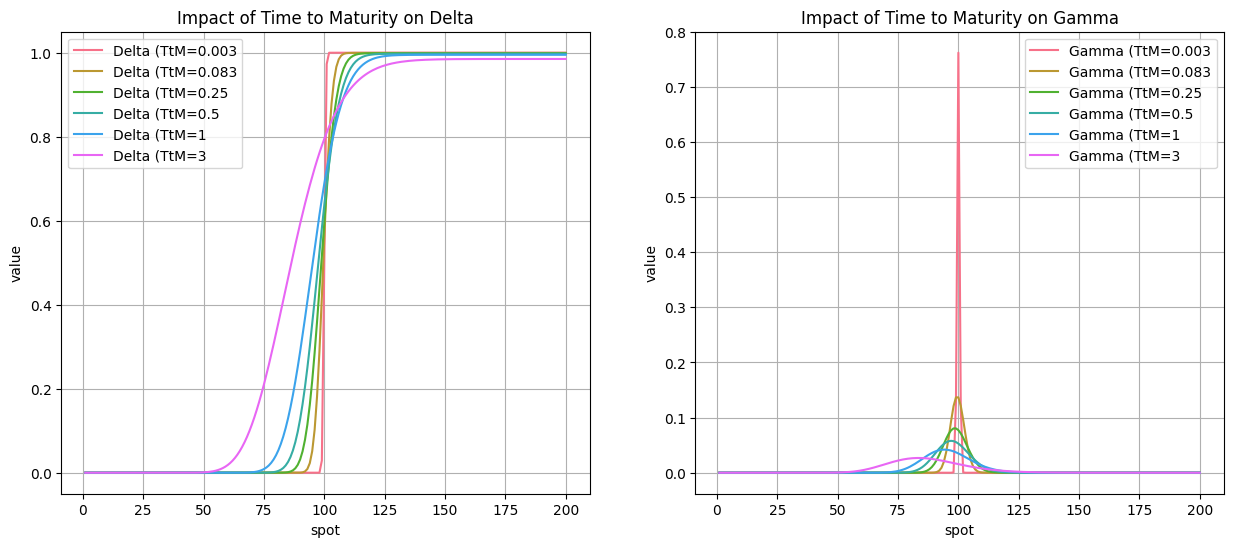

In [6]:
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

col1 = sns.color_palette('husl', len(T_val))

for i in range(len(T_val)):
  ax1.plot(spots1[i], delta_res_T[i], color=col1[i], label=f'Delta (TtM={round(T_val[i], 3)}')
  ax2.plot(spots1[i], gamma_res_T[i], color=col1[i], label=f'Gamma (TtM={round(T_val[i], 3)}')

ax1.set_xlabel('spot')
ax1.set_ylabel('value')
ax1.set_title('Impact of Time to Maturity on Delta')
ax1.legend()
ax1.grid()

ax2.set_xlabel('spot')
ax2.set_ylabel('value')
ax2.set_title('Impact of Time to Maturity on Gamma')
ax2.legend()
ax2.grid()
plt.show()

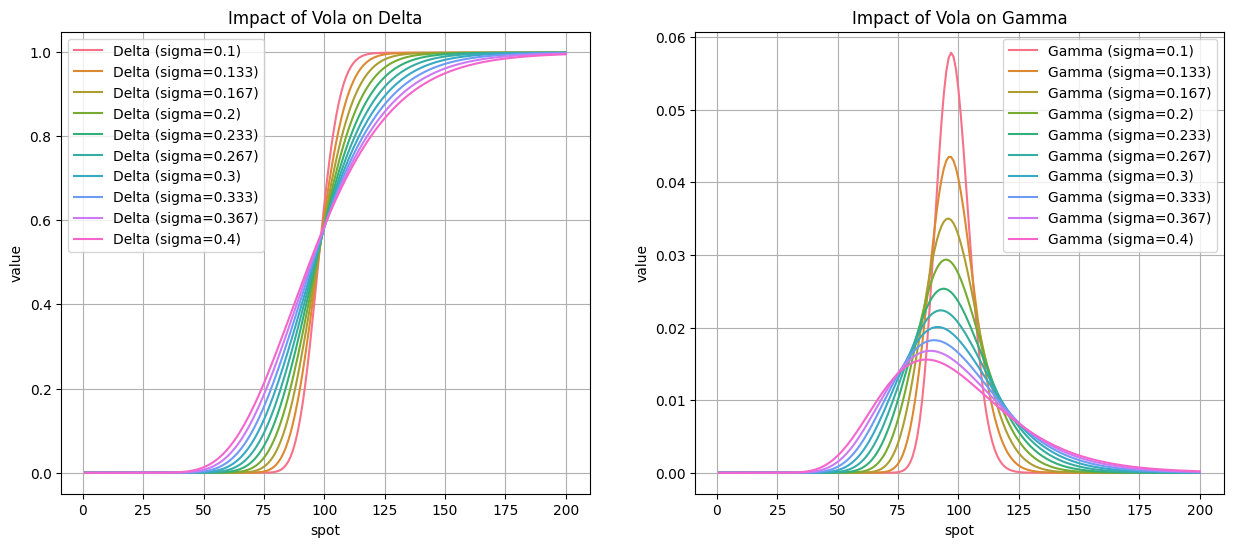

In [7]:
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 6))

col2 = sns.color_palette('husl', len(sigma_val))

for i in range(len(sigma_val)):
  ax3.plot(spots2[i], delta_res_sig[i], color=col2[i], label=f'Delta (sigma={round(sigma_val[i], 3)})')
  ax4.plot(spots2[i], gamma_res_sig[i], color=col2[i], label=f'Gamma (sigma={round(sigma_val[i], 3)})')

ax3.set_xlabel('spot')
ax3.set_ylabel('value')
ax3.set_title('Impact of Vola on Delta')
ax3.legend()
ax3.grid()

ax4.set_xlabel('spot')
ax4.set_ylabel('value')
ax4.set_title('Impact of Vola on Gamma')
ax4.legend()
ax4.grid()
plt.show()

### Exercise 4

In [11]:
df = pd.read_excel('implied_vola1.xls').iloc[3:, 1:]

In [20]:
strikes = df.iloc[0, 1:].values.astype(int)
maturities = df.iloc[1:, 0].values.astype(float)
call_prices = df.iloc[1:, 1:].values.astype(float)

In [14]:
# parameters
S0 = 52
r = 0.07

# Black-Scholes call price formula
def bs_call_price(S, K, T, r, sigma):
    if T <= 0:
        return max(S - K, 0)
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# bisection method
def implied_volatility(S, K, T, r, market_price):
    if market_price < max(S - K * np.exp(-r * T), 0):
        return 0.0
    
    # bounds for volatility
    vol_low = 0.001
    vol_high = 3.0
    
    # accuracy parameters
    max_iter = 100
    tolerance = 1e-8
    
    for i in range(max_iter):
        vol_mid = (vol_low + vol_high) / 2
        price_mid = bs_call_price(S, K, T, r, vol_mid)
        
        if abs(price_mid - market_price) < tolerance:
            return vol_mid
        
        if price_mid > market_price:
            vol_high = vol_mid
        else:
            vol_low = vol_mid
    
    return (vol_low + vol_high) / 2

T=0.0833, K=46, Market Price=6.3485, IV=0.2715
T=0.0833, K=48, Market Price=4.4461, IV=0.2356
T=0.0833, K=50, Market Price=2.6973, IV=0.2094
T=0.0833, K=52, Market Price=1.3027, IV=0.1918
T=0.0833, K=54, Market Price=0.4616, IV=0.1818
T=0.0833, K=56, Market Price=0.1199, IV=0.1786
T=0.0833, K=58, Market Price=0.0263, IV=0.1816
T=0.0833, K=60, Market Price=0.0061, IV=0.1900
T=0.1667, K=46, Market Price=6.6773, IV=0.2254
T=0.1667, K=48, Market Price=4.8554, IV=0.2075
T=0.1667, K=50, Market Price=3.2140, IV=0.1944
T=0.1667, K=52, Market Price=1.8823, IV=0.1856
T=0.1667, K=54, Market Price=0.9582, IV=0.1806
T=0.1667, K=56, Market Price=0.4275, IV=0.1790
T=0.1667, K=58, Market Price=0.1740, IV=0.1805
T=0.1667, K=60, Market Price=0.0689, IV=0.1847
T=0.2500, K=46, Market Price=7.0146, IV=0.2104
T=0.2500, K=48, Market Price=5.2549, IV=0.1984
T=0.2500, K=50, Market Price=3.6780, IV=0.1897
T=0.2500, K=52, Market Price=2.3744, IV=0.1838
T=0.2500, K=54, Market Price=1.4060, IV=0.1805
T=0.2500, K=5

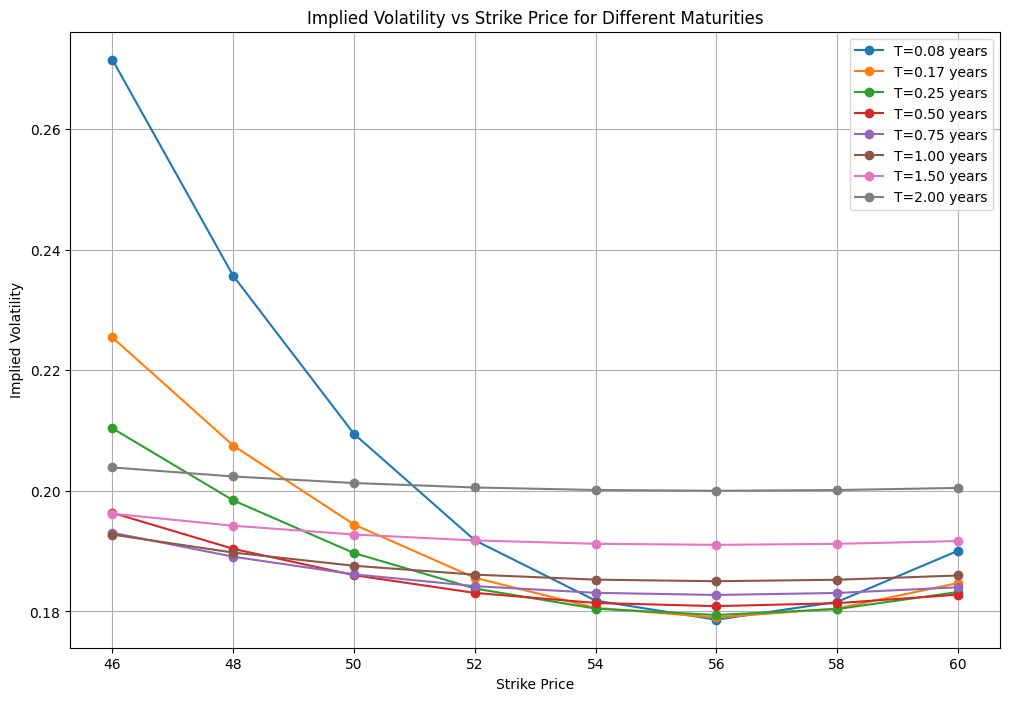

In [21]:
# implied volatilities for all options
implied_vols = np.zeros_like(call_prices)

for i, T in enumerate(maturities):
    for j, K in enumerate(strikes):
        market_price = call_prices[i, j]
        iv = implied_volatility(S0, K, T, r, market_price)
        implied_vols[i, j] = iv
        print(f"T={T:.4f}, K={K}, Market Price={market_price:.4f}, IV={iv:.4f}")

# (a) implied volatility as function of strike for different maturities
plt.figure(figsize=(12, 8))
for i, T in enumerate(maturities):
    plt.plot(strikes, implied_vols[i, :], 'o-', label=f'T={T:.2f} years')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility vs Strike Price for Different Maturities')
plt.legend()
plt.grid(True)
plt.show()

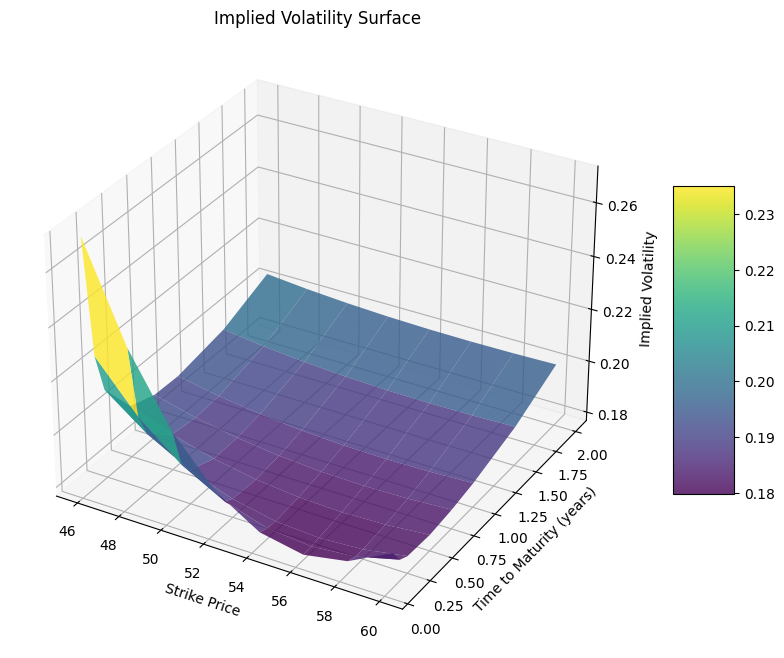

In [22]:
# (a) implied volatility surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(strikes, maturities)
surf = ax.plot_surface(X, Y, implied_vols, cmap='viridis', alpha=0.8)

ax.set_xlabel('Strike Price')
ax.set_ylabel('Time to Maturity (years)')
ax.set_zlabel('Implied Volatility')
ax.set_title('Implied Volatility Surface')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()

The downward volatility skew shows the market prices in a higher probability of a large price drop than a lognormal distribution implies, resulting in a negatively skewed and fat-tailed risk-neutral distribution.

As time to maturity increases, this skew flattens. This means the implied distribution becomes less negatively skewed and more lognormal over longer horizons, as the immediate fear of a crash diminishes.

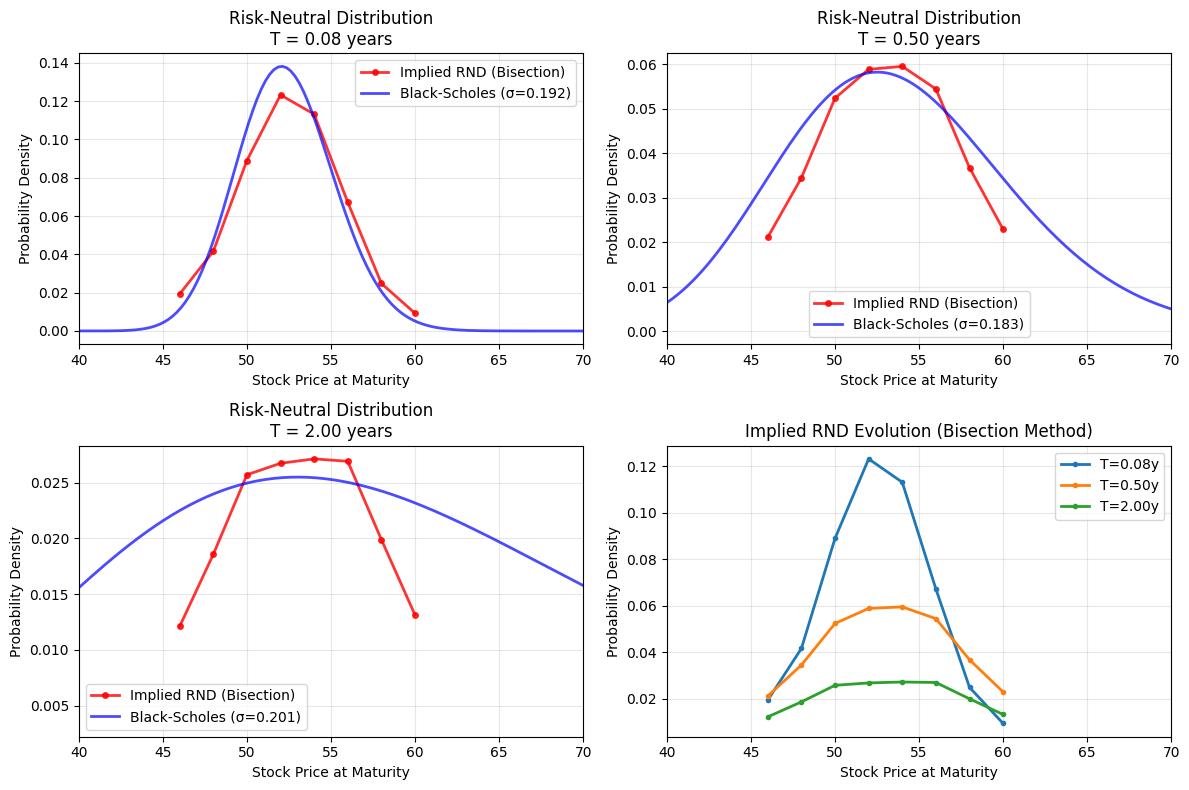

In [30]:
# risk-neutral distributions

def extract_risk_neutral_density(S0, r, T, strikes, call_prices):
    """
    risk-neutral density using Breeden-Litzenberger formula
    f(S_T) = e^{rT} * ∂²C/∂K²
    """

    sorted_indices = np.argsort(strikes)
    sorted_strikes = strikes[sorted_indices]
    sorted_prices = call_prices[sorted_indices]
    
    # first derivative
    dC_dK = np.gradient(sorted_prices, sorted_strikes)
    
    # second derivative
    d2C_dK2 = np.gradient(dC_dK, sorted_strikes)
    
    # risk-neutral density: f(S_T) = e^{rT} * ∂²C/∂K²
    risk_neutral_density = np.exp(r * T) * d2C_dK2
    
    risk_neutral_density = np.maximum(risk_neutral_density, 0)
    
    return sorted_strikes, risk_neutral_density

def black_scholes_density(S0, K_range, T, r, sigma):
    """Black-Scholes risk-neutral lognormal density"""
    d2 = (np.log(S0 / K_range) + (r - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    density = norm.pdf(-d2) / (K_range * sigma * np.sqrt(T))
    return density

# risk-neutral distribution using Bisection method results
plt.figure(figsize=(12, 8))

selected_maturities = [0, 3, 7]  # T=0.083, 0.5, 2.0 years

for i, mat_idx in enumerate(selected_maturities):
    plt.subplot(2, 2, i+1)
    
    T = maturities[mat_idx]
    call_prices_T = call_prices[mat_idx, :]
    
    # ATM implied volatility using bisection results
    atm_index = np.where(strikes == 52)[0][0]
    atm_vol = implied_vols[mat_idx, atm_index]
    
    # risk-neutral density using Breeden-Litzenberger
    sorted_strikes, rn_density = extract_risk_neutral_density(S0, r, T, strikes, call_prices_T)
    
    # Black-Scholes lognormal density with ATM volatility
    K_range = np.linspace(30, 80, 200)
    bs_density = black_scholes_density(S0, K_range, T, r, atm_vol)
    
    # Plot both distributions
    plt.plot(sorted_strikes, rn_density, 'ro-', linewidth=2, markersize=4, 
             label='Implied RND (Bisection)', alpha=0.8)
    plt.plot(K_range, bs_density, 'b-', linewidth=2, 
             label=f'Black-Scholes (σ={atm_vol:.3f})', alpha=0.7)
    
    plt.xlabel('Stock Price at Maturity')
    plt.ylabel('Probability Density')
    plt.title(f'Risk-Neutral Distribution\nT = {T:.2f} years')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(40, 70)

# Comparison subplot
plt.subplot(2, 2, 4)
for mat_idx in selected_maturities:
    T = maturities[mat_idx]
    call_prices_T = call_prices[mat_idx, :]
    
    sorted_strikes, rn_density = extract_risk_neutral_density(S0, r, T, strikes, call_prices_T)
    
    plt.plot(sorted_strikes, rn_density, 'o-', linewidth=2, markersize=3,
             label=f'T={T:.2f}y')

plt.xlabel('Stock Price at Maturity')
plt.ylabel('Probability Density')
plt.title('Implied RND Evolution (Bisection Method)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(40, 70)

plt.tight_layout()
plt.show()


In [50]:
# (c) Price call with K=53, T=15 months (1.25 years)
# 2D interpolation for implied volatility
from scipy.interpolate import griddata

# data for interpolation
points = []
values = []
for i, T in enumerate(maturities):
    for j, K in enumerate(strikes):
        points.append([K, T])
        values.append(implied_vols[i, j])

points = np.array(points)
values = np.array(values)

# interpolation IV for K=53, T=1.25
target_point = np.array([[53, 1.25]])
interp_iv = griddata(points, values, target_point, method='linear')[0]

print(f"Interpolated IV for K=53, T=1.25: {interp_iv:.4f}")

# price using BS formula
price_15m = bs_call_price(S0, 53, 1.25, r, interp_iv)
print(f"Calculated price: {price_15m:.4f}")

# min and max nearby prices for interval
nearby_points = []
for T in [1.0, 1.5]:
    for K in [52, 55]:
        nearby_points.append([K, T])

nearby_ivs = griddata(points, values, nearby_points, method='linear')
nearby_prices = [bs_call_price(S0, K, T, r, iv) for (K, T), iv in zip(nearby_points, nearby_ivs)]

price_min = min(nearby_prices)
price_max = max(nearby_prices)
print(f"Price interval: [{price_min:.4f}, {price_max:.4f}]")
print(f"Quoted price: {price_15m:.4f}")

Interpolated IV for K=53, T=1.25: 0.1885
Calculated price: 6.1598
Price interval: [4.1785, 7.6619]
Quoted price: 6.1598


In [52]:
# (d) Price call with K=53, T=10 days (0.0274 years) - FIXED
print("PRICING: K=53, T=0.0274 YEARS (10 DAYS)")

# extrapolation using shortest two maturities
if 0.0274 < maturities[0]:
    # extrapolate from two shortest maturities
    T1, T2 = maturities[0], maturities[1]
    
    # IVs for K=53 by interpolating in strike dimension for both maturities
    iv1 = interp1d(strikes, implied_vols[0, :], kind='linear', 
                   bounds_error=False, fill_value='extrapolate')(53)
    iv2 = interp1d(strikes, implied_vols[1, :], kind='linear', 
                   bounds_error=False, fill_value='extrapolate')(53)
    
    # linear extrapolation in time
    slope = (iv2 - iv1) / (T2 - T1)
    interp_iv_short_extrap = iv1 + slope * (0.0274 - T1)
    print(f"Extrapolated IV (time+strike): {interp_iv_short_extrap:.4f}")
    
    # the extrapolated value
    interp_iv_short = interp_iv_short_extrap

price_10d = bs_call_price(S0, 53, 0.0274, r, interp_iv_short)
print(f"Calculated price: {price_10d:.4f}")

# interval
nearby_prices_short = []
nearby_combinations_short = []

# two shortest maturities and nearby strikes
for T in [maturities[0], maturities[1]]:  # 0.0833, 0.1667
    for K in [52, 55]:
        # interpolation IV for each (K,T) combination
        iv_interp = interp1d(strikes, implied_vols[np.where(maturities == T)[0][0], :], 
                            kind='linear', bounds_error=False, fill_value='extrapolate')(K)
        price = bs_call_price(S0, K, T, r, iv_interp)
        nearby_prices_short.append(price)
        nearby_combinations_short.append((K, T))
        print(f"  K={K}, T={T:.4f}: IV={iv_interp:.4f}, Price={price:.4f}")

price_min_short = min(nearby_prices_short)
price_max_short = max(nearby_prices_short)
print(f"\nPrice interval: [{price_min_short:.4f}, {price_max_short:.4f}]")
print(f"Quoted price: {price_10d:.4f}")

PRICING: K=53, T=0.0274 YEARS (10 DAYS)
Extrapolated IV (time+strike): 0.1893
Calculated price: 0.3020
  K=52, T=0.0833: IV=0.1918, Price=1.3027
  K=55, T=0.0833: IV=0.1802, Price=0.2464
  K=52, T=0.1667: IV=0.1856, Price=1.8823
  K=55, T=0.1667: IV=0.1798, Price=0.6524

Price interval: [0.2464, 1.8823]
Quoted price: 0.3020


The 15-month option price is significantly more precise because we can interpolate between surrounding data points (T=1.0 and T=1.5 years, K=52 and K=55). In contrast, the 10-day option requires extrapolation beyond our shortest available maturity (T=0.0833 years), making it unreliable due to unpredictable short-term volatility behavior. The 15-month price benefits from the smooth, well-defined volatility surface at longer maturities, while the 10-day price is highly sensitive to market microstructure and jumps.